In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn import metrics
from enum import Enum, auto
import joblib
from pathlib import Path

In [10]:
final_results_df = pd.DataFrame(columns=('accuracy', 'precision', 'recall', 'f1-score'))

In [11]:
#save values to final table



def saveMetricsFinalDf(name, y_test, y_predict):
    final_accuracy = round(classification_report(y_test, y_predict, labels=[1, 0], output_dict=True)['accuracy'],2)
    final_precision = round(classification_report(y_test, y_predict, labels=[1, 0], output_dict=True)['weighted avg']['precision'],2)
    final_recall = round(classification_report(y_test, y_predict, labels=[1, 0], output_dict=True)['weighted avg']['recall'],2)
    final_f1score = round(classification_report(y_test, y_predict, labels=[1, 0], output_dict=True)['weighted avg']['f1-score'],2)
    final_results_df.loc[name] = [final_accuracy, final_precision, final_recall, final_f1score]

def saveModel(model, model_name):
    
    dataset_italian = "italian"
    
    dataset_mdvr = "mdvr"
    # Save the trained model to a file
    
    dir_italian = os.path.join("../data/models/both")
    Path(dir).mkdir(parents=True, exist_ok=True)


    model_filename = os.path.join(dir , model_name + '.joblib')
    joblib.dump(model, model_filename)



# Model Building

In [12]:



features_df_italian = pd.read_csv("../data/tables/italian_features.csv")
reduced_features_df_italian = pd.read_csv("../data/tables/italian_reduced_features.csv")

features_df_mdvr = pd.read_csv("../data/tables/mdvr_features.csv")
reduced_features_df_mdvr = pd.read_csv("../data/tables/mdvr_reduced_features.csv")

# Concatenating the Italian and MDVR features dataframes
features_df = pd.concat([features_df_italian, features_df_mdvr], ignore_index=True)

# Concatenating the Italian and MDVR reduced features dataframes
reduced_features_df = pd.concat([reduced_features_df_italian, reduced_features_df_mdvr], ignore_index=True)

In [13]:
features_df

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,129.307948,2.064876,23.959287,0.004173,0.000032,0.002187,0.002334,0.006560,0.024436,0.224043,0.011687,0.014726,0.022840,0.035061,1.0
1,122.038081,5.155957,27.957755,0.004510,0.000037,0.002313,0.002498,0.006938,0.014446,0.175230,0.005156,0.006642,0.014389,0.015468,1.0
2,138.828247,2.136906,33.309475,0.002323,0.000017,0.001113,0.001179,0.003339,0.007289,0.068204,0.002894,0.004096,0.006777,0.008682,1.0
3,213.347835,3.371491,26.434427,0.003564,0.000016,0.002018,0.001938,0.006054,0.012845,0.112993,0.005653,0.007224,0.010797,0.016959,1.0
4,146.076736,16.504125,30.583621,0.003027,0.000021,0.001518,0.001504,0.004555,0.011083,0.122816,0.005337,0.005597,0.009463,0.016012,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,193.209988,22.001734,13.987776,0.016422,0.000085,0.007082,0.009177,0.021245,0.086505,0.940830,0.033335,0.049701,0.091187,0.100005,0.0
1280,117.653228,8.975167,12.096987,0.023460,0.000199,0.009138,0.011369,0.027414,0.093464,0.816516,0.031271,0.048431,0.106553,0.093812,0.0
1281,209.829420,44.053187,7.536627,0.027930,0.000133,0.012246,0.014303,0.036737,0.112934,1.146329,0.041220,0.058284,0.105104,0.123659,0.0
1282,153.326690,19.930532,12.334277,0.030168,0.000200,0.013322,0.014716,0.039966,0.076875,0.762129,0.023152,0.036592,0.071444,0.069456,0.0


In [14]:

reduced_features_df

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer
0,129.307948,2.064876,23.959287,0.004173,0.000032,0.002187,0.002334,0.006560,0.024436,0.224043,0.011687,0.014726,0.022840,0.035061
1,122.038081,5.155957,27.957755,0.004510,0.000037,0.002313,0.002498,0.006938,0.014446,0.175230,0.005156,0.006642,0.014389,0.015468
2,138.828247,2.136906,33.309475,0.002323,0.000017,0.001113,0.001179,0.003339,0.007289,0.068204,0.002894,0.004096,0.006777,0.008682
3,213.347835,3.371491,26.434427,0.003564,0.000016,0.002018,0.001938,0.006054,0.012845,0.112993,0.005653,0.007224,0.010797,0.016959
4,146.076736,16.504125,30.583621,0.003027,0.000021,0.001518,0.001504,0.004555,0.011083,0.122816,0.005337,0.005597,0.009463,0.016012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,193.209988,22.001734,13.987776,0.016422,0.000085,0.007082,0.009177,0.021245,0.086505,0.940830,0.033335,0.049701,0.091187,0.100005
1280,117.653228,8.975167,12.096987,0.023460,0.000199,0.009138,0.011369,0.027414,0.093464,0.816516,0.031271,0.048431,0.106553,0.093812
1281,209.829420,44.053187,7.536627,0.027930,0.000133,0.012246,0.014303,0.036737,0.112934,1.146329,0.041220,0.058284,0.105104,0.123659
1282,153.326690,19.930532,12.334277,0.030168,0.000200,0.013322,0.014716,0.039966,0.076875,0.762129,0.023152,0.036592,0.071444,0.069456


In [15]:
# lets build our classification model
# independent variables
X = reduced_features_df
# X=pd.DataFrame(X_stand1)
# the dependent variable
y = features_df['PD']



In [16]:


dataset = "both"

# Save the trained model to a file

dir = "../data/models/" + dataset + "/"
features_names_path = dir + 'features_names' + '.joblib'


In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [18]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(reduced_features_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(reduced_features_df.index)) * 100))

69.94% data is in training set
30.06% data is in test set


In [19]:
y_train_yPD=y_train[y_train==1].count()
y_train_nPD=y_train[y_train==0].count()
y_test_yPD=y_test[y_test==1].count()
y_test_nPD=y_test[y_test==0].count()

print("In the original dataset people who had parkinson Dieases    : {0} ({1:0.2f}%)".format(len(reduced_features_df.loc[features_df['PD'] == 1]), (len(reduced_features_df.loc[features_df['PD'] == 1])/len(reduced_features_df.index)) * 100))
print("In the original dataset people who didnot have Parkinson Disease   : {0} ({1:0.2f}%)".format(len(reduced_features_df.loc[features_df['PD'] == 0]), (len(reduced_features_df.loc[features_df['PD'] == 0])/len(reduced_features_df.index)) * 100))
print("")
print("In the training dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_train_yPD, (y_train_yPD/len(y_train))*100))
print("In the training dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_train_nPD, (y_train_nPD/len(y_train))*100))
print("")
print("In the test dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_test_yPD, (y_test_yPD/len(y_test))*100))
print("In the test dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_test_nPD, (y_test_nPD/len(y_test))*100))

In the original dataset people who had parkinson Dieases    : 608 (47.35%)
In the original dataset people who didnot have Parkinson Disease   : 676 (52.65%)

In the training dataset people who who had parkinson Dieases    : 422 (46.99%)
In the training dataset people who didnot have Parkinson Disease    : 476 (53.01%)

In the test dataset people who who had parkinson Dieases    : 186 (48.19%)
In the test dataset people who didnot have Parkinson Disease    : 200 (51.81%)


scScales impact

Gradient descent based algorithms like Linear Regression, Logistics Regression
Distance based algorithms like KNN, K-means and SVM
Scales dont impact:

Tree based algorithms like Decision trees

In [20]:
# Scale


sc = MinMaxScaler()


#print(X_train.loc[195])

X_train = pd.DataFrame(sc.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(sc.transform(X_test.values), columns=X_test.columns, index=X_test.index)



#print(X_train.loc[195])

#X_test.to_csv('/Users/tomas/Desktop/X_test_scaled.csv', index=False)



if not os.path.exists(dir):
    os.makedirs(dir, exist_ok=True)


scaler_path = dir + 'scaler' + '.save'
features_names_path = dir + 'features_names' + '.joblib'

joblib.dump(sc, scaler_path)
joblib.dump(X_train.columns, features_names_path)

pd.DataFrame(X_train)

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer
1222,1.000000,0.408382,0.333521,0.365418,0.178386,0.341217,0.378858,0.341217,0.487382,0.515860,0.432031,0.477128,0.527945,0.432031
242,0.268338,0.107936,0.746848,0.146209,0.197386,0.122662,0.148487,0.122662,0.135393,0.135192,0.153726,0.147376,0.153098,0.153726
17,0.720504,0.050159,0.917819,0.059702,0.054395,0.082898,0.073220,0.082898,0.097132,0.084103,0.096206,0.081419,0.080750,0.096206
629,0.225755,0.436284,0.207712,0.753088,0.951868,0.579687,0.650211,0.579687,0.823557,0.837628,0.855422,0.840404,0.845195,0.855422
1127,0.848229,0.526657,0.353144,0.488996,0.340982,0.558059,0.508069,0.558059,0.446820,0.534907,0.338860,0.293270,0.316436,0.338860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.253625,0.259602,0.253973,0.762201,0.931393,0.624311,0.749155,0.624311,0.838338,0.874409,0.747161,0.751721,0.797220,0.747161
905,0.923106,0.462864,0.196090,0.553004,0.368155,0.482631,0.503133,0.482631,0.629944,0.612732,0.610728,0.523895,0.622614,0.610728
1096,0.699433,0.283060,0.023089,0.711623,0.553284,0.825425,0.921805,0.825425,1.000000,1.000000,1.000000,1.000000,0.875066,1.000000
235,0.441124,0.059991,0.615808,0.203534,0.214745,0.255874,0.255903,0.255874,0.235140,0.214507,0.323146,0.251312,0.186052,0.323146


In [21]:
if (pd.DataFrame(X_train).isnull().sum().any()==0):
    print('There are no null values in the training datset')
else:
    print('There are null values in the training datset')

if (pd.DataFrame(X_test).isnull().sum().any()==0):
    print('There are no null values in the test datset')
else:
    print('There are null values in the test datset')

There are no null values in the training datset
There are no null values in the test datset


In [22]:
def predictedVsActualTable(model, X_test, y_test, model_type = None):
    # Predict probabilities on the test data
    y_predict_proba = model.predict_proba(X_test)

    # y_predict_prob is an array where each row contains the probability estimates for each class
    # Assuming you are interested in the probability of the positive class (class 1)
    positive_class_prob = y_predict_proba[:, 1]

    # Create a DataFrame to compare each individual predicted probability to the real value
    comparison_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted_Probability': positive_class_prob,
        'Predicted_Class': model.predict(X_test)
    })
    if model_type == None:
        comparison_df.Name = type(model).__name__
    else:
        comparison_df.Name = model_type.__name__

    # Print or use the DataFrame as needed
    pd.set_option('display.max_rows', 50)
    return comparison_df




def predictedVsActualPlot(comparison_df):

    # Sort the DataFrame by the 'Actual' column
    model_name = comparison_df.Name
    sorted_df = comparison_df.sort_values(by='Actual')

    # Scatter plot of Actual vs Predicted Probability
    plt.figure(figsize=(10, 7))
    plt.scatter(range(len(sorted_df)), sorted_df['Actual'], label='Actual', color='blue', alpha=0.7)
    plt.scatter(range(len(sorted_df)), sorted_df['Predicted_Probability'], label='Predicted Probability', color='red', alpha=0.7)

    # Draw a horizontal line at y=0.5
    plt.axhline(y=0.5, color='green', linestyle='--', label='Threshold (0.5)')

    plt.xlabel('Data Point (Index)')
    plt.ylabel('Values')
    plt.title('Actual vs Predicted Probability ' + model_name)
    plt.legend()
    plt.show()

# Logistic Regression

In [23]:
# # Fit the model on train data
# model_lr = LogisticRegression(solver="liblinear")
# model_lr.fit(X_train,y_train)

# # predict on the test data
# y_predict_lr = model_lr.predict(X_test)
# y_predict_lr

# coef_df = pd.DataFrame(model_lr.coef_)
# coef_df['intercept'] = model_lr.intercept_
# coef_df

# model_score_lr = model_lr.score(X_test, y_test)


In [24]:
# table_lr = predictedVsActualTable(model_lr, X_test, y_test)
# print(table_lr)

In [25]:
# pva_plot_lr = predictedVsActualPlot(table_lr)

In [26]:
# print("Model Accuracy of Logistic Regression is: {0:.4f}".format(model_score_lr))
# print()

# print("Confusion Matrix - Logistic Regression")
# cm=metrics.confusion_matrix(y_test, y_predict_lr, labels=[1, 0])

# df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
#                   columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (4,2))
# sns.heatmap(df_cm, annot=True)

# print("Classification Report - Logistic Regression")
# print(metrics.classification_report(y_test, y_predict_lr, labels=[1, 0]))

In [27]:
# saveMetricsFinalDf('Logistic Regression', y_test, y_predict_lr)

# saveModel(model_lr, 'lr')

# Logistic Regression with Hyperparameter tuning

In [28]:
########Hyperparameter tuning for SVM####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

#Convert to dictionary
hyperparameters = dict(solver=solvers,penalty=penalty,C=c_values)
#Create new LR object
model_lr_2 = LogisticRegression(max_iter=1000)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(model_lr_2, hyperparameters, cv=cv)


#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model_lr_2 = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model_lr_2.best_score_)
print('Best Hyperparameters: %s' % best_model_lr_2.best_params_)
print(hyperparameters)


y_pred_lr_2 = best_model_lr_2.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_lr_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


Best Score: 0.7201498127340824
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}


In [29]:
pd.set_option('display.max_rows', None)
table_lr_2 = predictedVsActualTable(best_model_lr_2, X_test, y_test, type(model_lr_2))


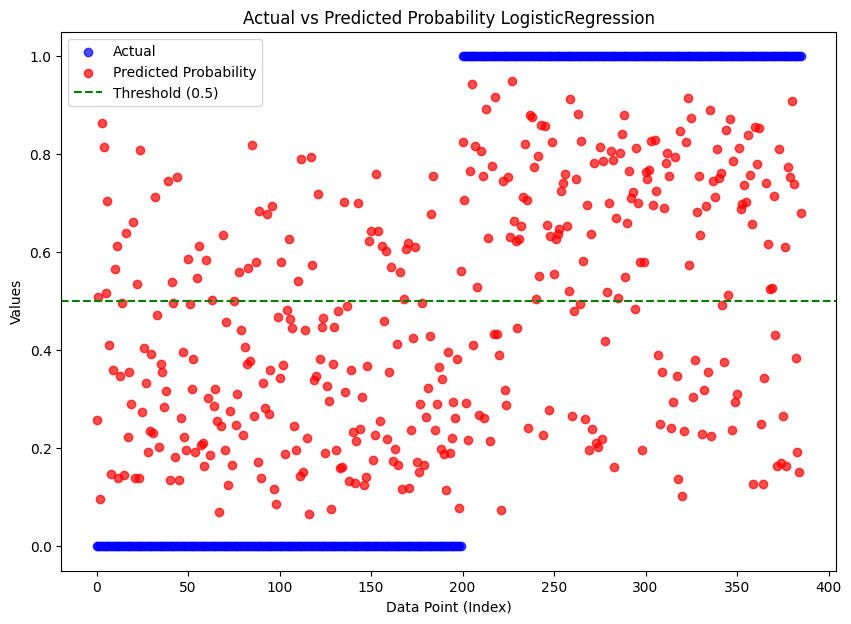

In [30]:
pva_plot_lr_2 = predictedVsActualPlot(table_lr_2)

              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72       200
         1.0       0.70      0.67      0.69       186

    accuracy                           0.70       386
   macro avg       0.70      0.70      0.70       386
weighted avg       0.70      0.70      0.70       386



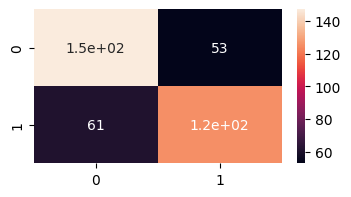

In [31]:

plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_knn_2, annot=True)


#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_lr_2))
#Checking performance our model with ROC Score.

saveMetricsFinalDf('Logistic Regression (HPT)', y_test, y_pred_lr_2)
saveModel(best_model_lr_2, 'lr_2')

# KNN

In [32]:
# # Call Nearest Neighbour algorithm and fit the model on train data
# model_knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
# model_knn.fit(X_train, np.ravel(y_train,order='C'))

# # For every test data point, predict it's label based on 5 nearest neighbours in this model. 
# #The majority class will be assigned to the test data point

# y_predict_knn = model_knn.predict(X_test)
# model_score_knn = model_knn.score(X_test, y_test)


In [33]:
# table_knn = predictedVsActualTable(model_knn, X_test, y_test)
# print(table_knn)


In [34]:
# predictedVsActualPlot(table_knn)

In [35]:
# print("Classification Report - KNN")
# print(metrics.classification_report(y_test, y_predict_knn, labels=[1, 0]))

# print("Confusion Matrix - KNN")
# cm=metrics.confusion_matrix(y_test, y_predict_knn, labels=[1, 0])
# df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
#                   columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (4,2))
# sns.heatmap(df_cm, annot=True)

# saveMetricsFinalDf('KNN', y_test, y_predict_knn)
# saveModel(model_knn, 'knn')

# KNN with hyperparameter tuning

In [36]:
# Assuming you have X_train, X_test, y_train, and y_test
# If not, replace this with your actual data loading and splitting logic

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 20)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a KNeighborsClassifier
model_knn_2 = KNeighborsClassifier()

# Create GridSearchCV
clf = GridSearchCV(model_knn_2, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
clf.fit(X_train, np.ravel(y_train, order='C'))

# Get the best parameters
best_params = clf.best_params_

# Get the best model
best_model_knn_2 = clf.best_estimator_

# Evaluate the best model on the test set
y_pred_knn_2 = best_model_knn_2.predict(X_test)
model_score_knn = best_model_knn_2.score(X_test, y_test)

# Print the results
print('Best Hyperparameters:', best_params)
print('Best Model Score:', model_score_knn)

Best Hyperparameters: {'n_neighbors': 12, 'p': 2, 'weights': 'distance'}
Best Model Score: 0.7253886010362695


In [37]:
table_knn_2 = predictedVsActualTable(best_model_knn_2, X_test, y_test, type(model_knn_2))
print(table_knn_2)

      Actual  Predicted_Probability  Predicted_Class
303      0.0               0.072690              0.0
355      0.0               0.000000              0.0
452      0.0               0.181116              0.0
259      1.0               1.000000              1.0
789      1.0               0.582632              1.0
...      ...                    ...              ...
791      1.0               0.776559              1.0
1097     0.0               0.425643              0.0
692      1.0               0.318556              0.0
769      1.0               0.510294              1.0
868      0.0               0.305680              0.0

[386 rows x 3 columns]


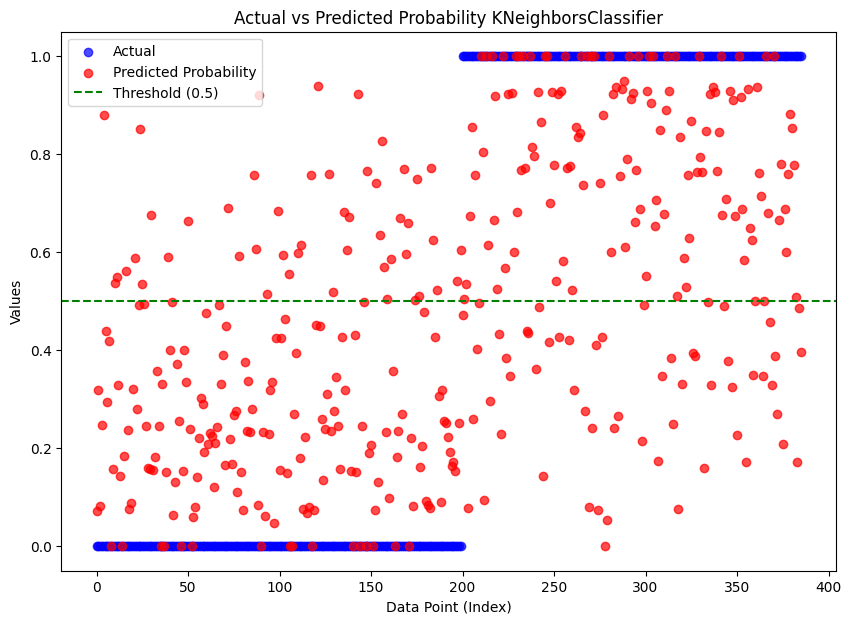

In [38]:
predictedVsActualPlot(table_knn_2)

72.53886010362694
              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74       200
         1.0       0.73      0.69      0.71       186

    accuracy                           0.73       386
   macro avg       0.73      0.72      0.72       386
weighted avg       0.73      0.73      0.72       386



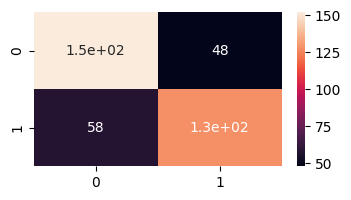

In [39]:

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.

plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_knn_2, annot=True)

saveMetricsFinalDf('KNN (HPT)', y_test, y_pred_knn_2)
saveModel(best_model_knn_2, 'knn_2')

# Naive Bayes

### No important parameters to tune

In [40]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_predict_nb = model_nb.predict(X_test)
model_score_nb=metrics.accuracy_score(y_test, y_predict_nb)


In [41]:
table_nb = predictedVsActualTable(model_nb, X_test, y_test)
table_nb.Name = type(GaussianNB()).__name__
print(table_nb)

      Actual  Predicted_Probability  Predicted_Class
303      0.0               0.464855              0.0
355      0.0               0.220588              0.0
452      0.0               0.217094              0.0
259      1.0               0.999648              1.0
789      1.0               0.584332              1.0
...      ...                    ...              ...
791      1.0               0.225454              0.0
1097     0.0               0.146046              0.0
692      1.0               0.139560              0.0
769      1.0               0.026801              0.0
868      0.0               0.037446              0.0

[386 rows x 3 columns]


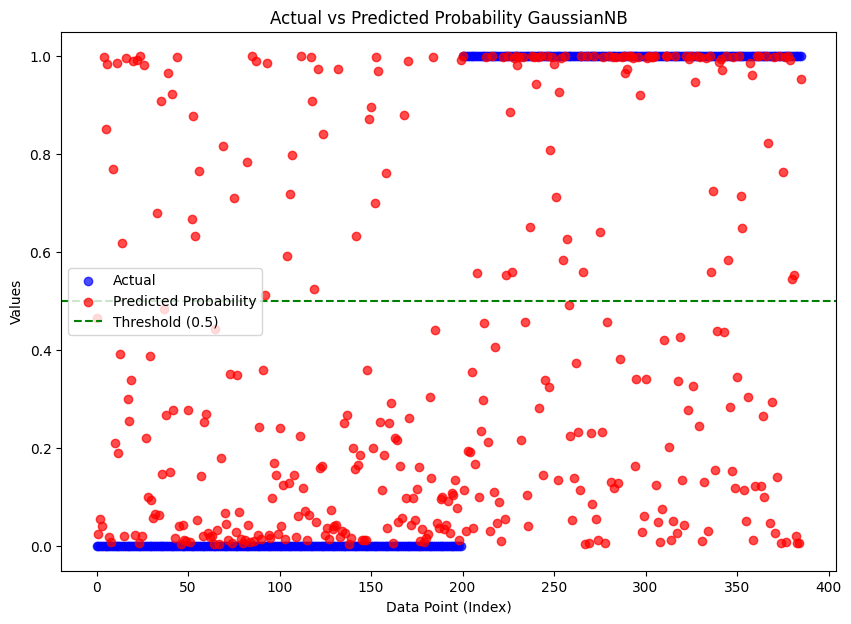

In [42]:
predictedVsActualPlot(table_nb)

Confusion Matrix - Naive Bayes
Classification Report - Naive Bayes
              precision    recall  f1-score   support

           1       0.65      0.48      0.56       186
           0       0.61      0.76      0.68       200

    accuracy                           0.63       386
   macro avg       0.63      0.62      0.62       386
weighted avg       0.63      0.63      0.62       386



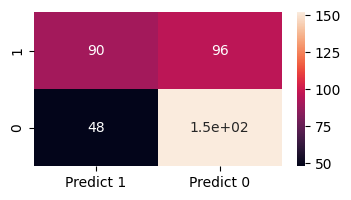

In [43]:
print("Confusion Matrix - Naive Bayes")
cm=metrics.confusion_matrix(y_test, y_predict_nb, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)

print("Classification Report - Naive Bayes")
print(metrics.classification_report(y_test, y_predict_nb, labels=[1, 0]))

saveMetricsFinalDf('NB', y_test, y_predict_nb)
saveModel(model_nb, 'nb')

# SVM

In [44]:

# model_svm = svm.SVC(gamma=0.025, C=3, probability=True)
# model_svm.fit(X_train , y_train)
# y_predict_svm = model_svm.predict(X_test)
# model_score_svm=metrics.accuracy_score(y_test, y_predict_svm)


In [45]:
# table_svm = predictedVsActualTable(model_svm, X_test, y_test)
# print(table_svm)

In [46]:
# predictedVsActualPlot(table_svm)

In [47]:
# print("Confusion Matrix - SVM")
# cm=metrics.confusion_matrix(y_test, y_predict_svm, labels=[1, 0])
# df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
#                   columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (4,2))
# sns.heatmap(df_cm, annot=True)

# print("Classification Report - SVM")
# print(metrics.classification_report(y_test, y_predict_svm, labels=[1, 0]))

# saveMetricsFinalDf('SVM', y_test, y_predict_svm)
# saveModel(model_svm, 'svm')

# SVM with hyperparameter tuning

In [48]:
########Hyperparameter tuning for SVM####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['rbf']

#Convert to dictionary
hyperparameters = dict(C=C, gamma=gamma, kernel=kernel)
#Create new SVM object
model_svm_2 = svm.SVC(probability=True)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(model_svm_2, hyperparameters, refit=True)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model_svm_2 = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model_svm_2.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model_svm_2.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model_svm_2.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model_svm_2.best_score_)
print('Best Hyperparameters: %s' % best_model_svm_2.best_params_)
print(hyperparameters)
y_pred_svm_2 = best_model_svm_2.predict(X_test)

conf_matrix_svm_2 = confusion_matrix(y_test, y_pred_svm_2)

accuracy_svm_2 = ((conf_matrix_svm_2[0,0] + conf_matrix_svm_2[1,1])/(conf_matrix_svm_2[0,0] +conf_matrix_svm_2[0,1]+conf_matrix_svm_2[1,0]+conf_matrix_svm_2[1,1]))*100


Best Score: 0.8140533829919306
Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}


In [49]:
table_svm_2 = predictedVsActualTable(best_model_lr_2, X_test, y_test, type(model_svm_2))
print(table_svm_2)

      Actual  Predicted_Probability  Predicted_Class
303      0.0               0.258004              0.0
355      0.0               0.198719              0.0
452      0.0               0.412440              0.0
259      1.0               0.760214              1.0
789      1.0               0.741458              1.0
...      ...                    ...              ...
791      1.0               0.911773              1.0
1097     0.0               0.086717              0.0
692      1.0               0.479158              0.0
769      1.0               0.347615              0.0
868      0.0               0.365097              0.0

[386 rows x 3 columns]


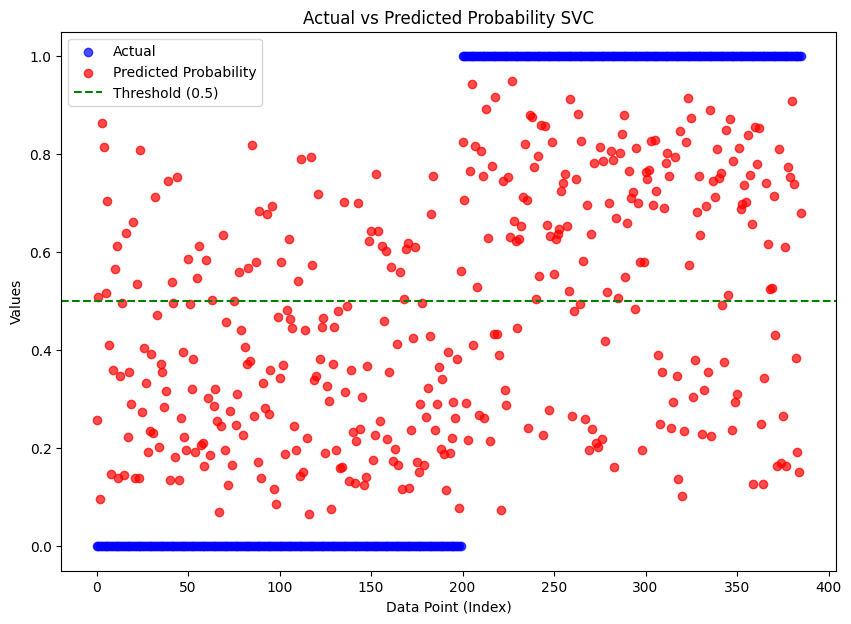

In [50]:
predictedVsActualPlot(table_svm_2)

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79       200
         1.0       0.78      0.75      0.77       186

    accuracy                           0.78       386
   macro avg       0.78      0.78      0.78       386
weighted avg       0.78      0.78      0.78       386



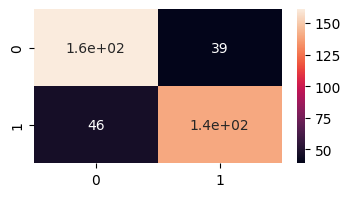

In [51]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_svm_2))
#Checking performance our model with ROC Score.


plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_svm_2, annot=True)

saveMetricsFinalDf('SVM (HPT)', y_test, y_pred_svm_2)
saveModel(best_model_svm_2, 'svm_2')

# Random Forest

In [52]:
# model_rf = RandomForestClassifier(n_estimators = 50,random_state=1,max_features=3) 
# model_rf = model_rf.fit(X_train, y_train)
# y_predict_rf = model_rf.predict(X_test)
# print(model_rf.score(X_test, y_test))

In [53]:
# table_rf = predictedVsActualTable(model_rf, X_test, y_test)
# print(table_rf)

In [54]:
# predictedVsActualPlot(table_rf)

In [55]:
# print("Confusion Matrix -Random Forest")
# cm=metrics.confusion_matrix(y_test, y_predict_rf, labels=[1, 0])
# df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
#                   columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (4,2))
# sns.heatmap(df_cm, annot=True)

In [56]:
# print("Classification Report - Random Forest")
# print(metrics.classification_report(y_test, y_predict_rf, labels=[1, 0]))

# saveMetricsFinalDf('Random Forest', y_test, y_predict_rf)
# saveModel(model_rf, 'rf')

# Random Forest with Hyperparameter Tuning

In [57]:
# Assuming X_train, X_test, y_train, y_test are already defined

# Define the RandomForestClassifier with default parameters
model_rf = RandomForestClassifier(random_state=1)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of trees in the forest
    'max_features': [3, 5, 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
}

# Create GridSearchCV
grid_search_rf = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Print the best parameters
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Use the best model for predictions
best_model_rf = grid_search_rf.best_estimator_
y_predict_rf = best_model_rf.predict(X_test)

Best Hyperparameters for Random Forest: {'max_depth': None, 'max_features': 5, 'n_estimators': 150}


In [58]:
table_rf = predictedVsActualTable(best_model_rf, X_test, y_test)
print(table_rf)

      Actual  Predicted_Probability  Predicted_Class
303      0.0               0.266667              0.0
355      0.0               0.046667              0.0
452      0.0               0.400000              0.0
259      1.0               0.866667              1.0
789      1.0               0.966667              1.0
...      ...                    ...              ...
791      1.0               0.953333              1.0
1097     0.0               0.480000              0.0
692      1.0               0.493333              0.0
769      1.0               0.626667              1.0
868      0.0               0.360000              0.0

[386 rows x 3 columns]


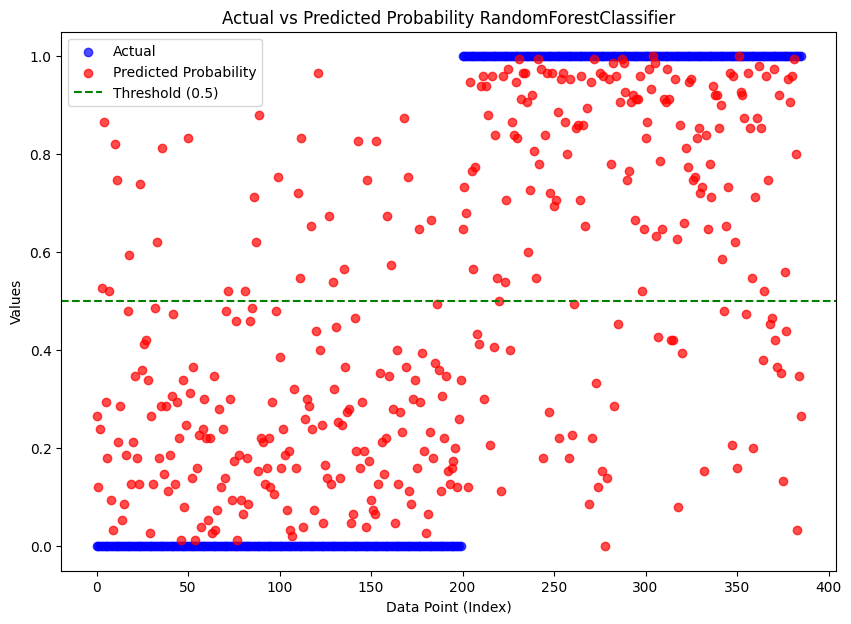

In [59]:
predictedVsActualPlot(table_rf)

Confusion Matrix -Random Forest


<Axes: >

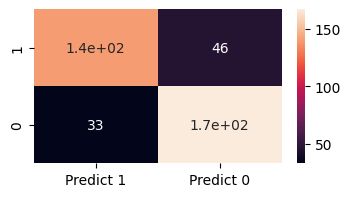

In [60]:
print("Confusion Matrix -Random Forest")
cm=metrics.confusion_matrix(y_test, y_predict_rf, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)

In [61]:
print("Classification Report - Random Forest")
print(metrics.classification_report(y_test, y_predict_rf, labels=[1, 0]))

Classification Report - Random Forest
              precision    recall  f1-score   support

           1       0.81      0.75      0.78       186
           0       0.78      0.83      0.81       200

    accuracy                           0.80       386
   macro avg       0.80      0.79      0.79       386
weighted avg       0.80      0.80      0.79       386



In [62]:
# Save metrics and model
saveMetricsFinalDf('Random Forest (HPT)', y_test, y_predict_rf)
saveModel(best_model_rf, 'rf_2')

# Bagging

In [63]:
# model_bgcl = BaggingClassifier(n_estimators=50,random_state=1)
# model_bgcl = model_bgcl.fit(X_train, y_train)
# y_predict_bag = model_bgcl.predict(X_test)
# print(model_bgcl.score(X_test , y_test))

In [64]:
# table_bgcl = predictedVsActualTable(model_bgcl, X_test, y_test)
# print(table_bgcl)

In [65]:
# predictedVsActualPlot(table_bgcl)

In [66]:
# print("Confusion Matrix -Bagging Classifier")
# cm=metrics.confusion_matrix(y_test, y_predict_bag, labels=[1, 0])
# df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
#                   columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (4,2))
# sns.heatmap(df_cm, annot=True)

# print("Classification Report - Bagging Classifier")
# print(metrics.classification_report(y_test, y_predict_bag, labels=[1, 0]))

# saveMetricsFinalDf('Bagging', y_test, y_predict_bag)
# saveModel(model_bgcl, 'bgcl')

# Bagging with Hyperparameter Tuning

In [67]:
#TESTE


# Define the Bagging Classifier with hyperparameters to be tuned
model_bgcl_2 = BaggingClassifier(random_state=1)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],  # Adjust the number of estimators
    # You can add more hyperparameters to tune here
}

# Define the scoring method, e.g., accuracy
scoring = make_scorer(accuracy_score)

# Create the Grid Search object
grid_search = GridSearchCV(model_bgcl_2, param_grid, scoring=scoring, cv=5)

# Fit the Grid Search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best Bagging Classifier model
best_model_bgcl_2 = grid_search.best_estimator_

# Fit the best model on the training data
best_model_bgcl_2.fit(X_train, y_train)

# Make predictions on the test set
y_predict_bag_2 = best_model_bgcl_2.predict(X_test)


Best Hyperparameters: {'n_estimators': 30}


In [68]:
table_bgcl_2 = predictedVsActualTable(best_model_bgcl_2, X_test, y_test, type(model_bgcl_2))
print(table_bgcl_2)

      Actual  Predicted_Probability  Predicted_Class
303      0.0               0.200000              0.0
355      0.0               0.000000              0.0
452      0.0               0.500000              0.0
259      1.0               1.000000              1.0
789      1.0               0.966667              1.0
...      ...                    ...              ...
791      1.0               0.966667              1.0
1097     0.0               0.366667              0.0
692      1.0               0.666667              1.0
769      1.0               0.633333              1.0
868      0.0               0.166667              0.0

[386 rows x 3 columns]


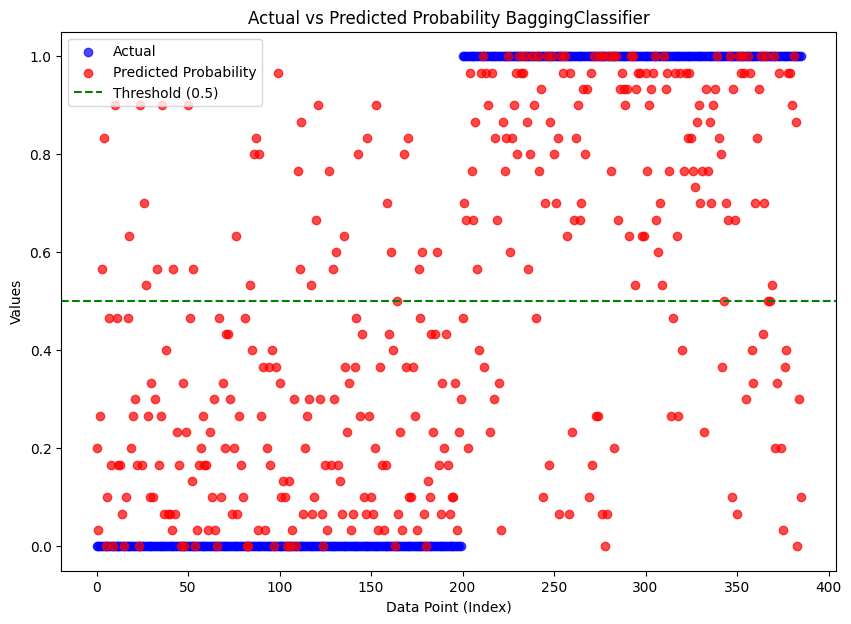

In [69]:
predictedVsActualPlot(table_bgcl_2)

Confusion Matrix - Bagging Classifier
Classification Report - Bagging Classifier
              precision    recall  f1-score   support

           1       0.79      0.75      0.77       186
           0       0.78      0.81      0.79       200

    accuracy                           0.78       386
   macro avg       0.78      0.78      0.78       386
weighted avg       0.78      0.78      0.78       386



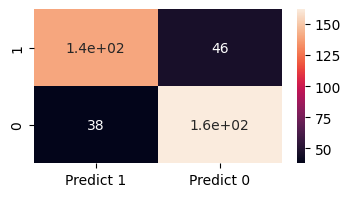

In [70]:

# Compute and print the confusion matrix
print("Confusion Matrix - Bagging Classifier")
cm = confusion_matrix(y_test, y_predict_bag_2, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(4, 2))
sns.heatmap(df_cm, annot=True)

# Print the classification report
print("Classification Report - Bagging Classifier")
print(classification_report(y_test, y_predict_bag_2, labels=[1, 0]))

saveMetricsFinalDf('Bagging (HPT)', y_test, y_predict_bag_2)
saveModel(best_model_bgcl_2, 'bgcl_2')


# AdaBoost

In [71]:
# model_adabc = AdaBoostClassifier(n_estimators=50, random_state=1)
# #abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
# model_adabc = model_adabc.fit(X_train, y_train)
# y_predict_ada = model_adabc.predict(X_test)


In [72]:
# table_adabc = predictedVsActualTable(model_adabc, X_test, y_test)
# print(table_adabc)

In [73]:
# predictedVsActualPlot(table_adabc)

In [74]:
# print("Confusion Matrix -Ada Boost")
# cm=metrics.confusion_matrix(y_test, y_predict_ada, labels=[1, 0])
# df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
#                   columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (4,2))
# sns.heatmap(df_cm, annot=True)

# print("Classification Report - Ada Boost")
# print(metrics.classification_report(y_test, y_predict_ada, labels=[1, 0]))

# saveMetricsFinalDf('AdaBoost', y_test, y_predict_ada)
# saveModel(model_adabc, 'adabc')

# AdaBoost with Hyperparameter Tuning

In [75]:

# Define the AdaBoost Classifier with hyperparameters to be tuned
model_adabc_2 = AdaBoostClassifier(random_state=1)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],  # Adjust the number of estimators
    # You can add more hyperparameters to tune here
}

# Define the scoring method, e.g., accuracy
scoring = make_scorer(accuracy_score)

# Create the Grid Search object
grid_search = GridSearchCV(model_adabc_2, param_grid, scoring=scoring, cv=5)

# Fit the Grid Search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best AdaBoost Classifier model
best_model_adabc_2 = grid_search.best_estimator_

# Fit the best model on the training data
best_model_adabc_2.fit(X_train, y_train)

# Make predictions on the test set
y_predict_ada_2 = best_model_adabc_2.predict(X_test)



Best Hyperparameters: {'n_estimators': 30}


In [76]:
table_adabc_2 = predictedVsActualTable(best_model_adabc_2, X_test, y_test, type(model_adabc_2))
print(table_adabc_2)

      Actual  Predicted_Probability  Predicted_Class
303      0.0               0.478922              0.0
355      0.0               0.486689              0.0
452      0.0               0.495106              0.0
259      1.0               0.508778              1.0
789      1.0               0.520537              1.0
...      ...                    ...              ...
791      1.0               0.524845              1.0
1097     0.0               0.489831              0.0
692      1.0               0.495898              0.0
769      1.0               0.492711              0.0
868      0.0               0.495022              0.0

[386 rows x 3 columns]


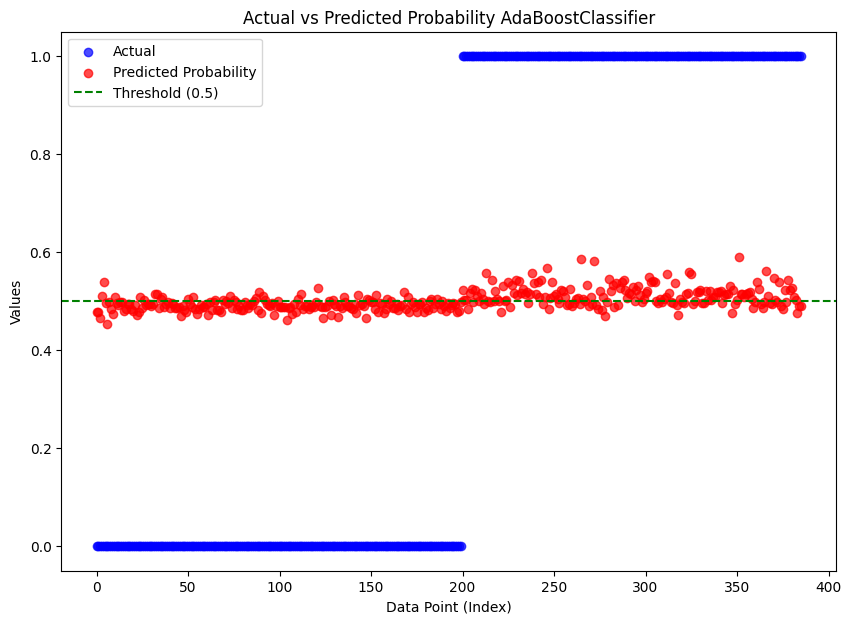

In [77]:
predictedVsActualPlot(table_adabc_2)

Confusion Matrix - Ada Boost
Classification Report - Ada Boost
              precision    recall  f1-score   support

           1       0.77      0.72      0.74       186
           0       0.75      0.80      0.77       200

    accuracy                           0.76       386
   macro avg       0.76      0.76      0.76       386
weighted avg       0.76      0.76      0.76       386



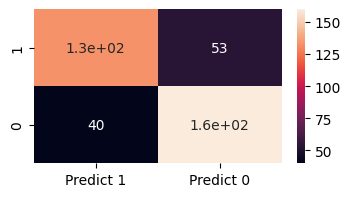

In [78]:

# Compute and print the confusion matrix
print("Confusion Matrix - Ada Boost")
cm = confusion_matrix(y_test, y_predict_ada_2, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(4, 2))
sns.heatmap(df_cm, annot=True)

# Print the classification report
print("Classification Report - Ada Boost")
print(classification_report(y_test, y_predict_ada_2, labels=[1, 0]))

saveMetricsFinalDf('AdaBoost (HPT)', y_test, y_predict_ada_2)
saveModel(best_model_adabc_2, 'adabc_2')


# XG Boost

In [79]:
# model_xgbc = XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=4)
# model_xgbc = model_xgbc.fit(X_train, y_train)
# y_predict_XGB = model_xgbc.predict(X_test)


In [80]:
# table_xgbc = predictedVsActualTable(model_xgbc, X_test, y_test)
# print(table_xgbc)

In [81]:
# predictedVsActualPlot(table_xgbc)

In [82]:
# print("Confusion Matrix - XGB Classifier")
# cm=metrics.confusion_matrix(y_test, y_predict_XGB, labels=[1, 0])
# df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
#                   columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (4,2))
# sns.heatmap(df_cm, annot=True)

# print("Classification Report - XGB Classifier")
# print(metrics.classification_report(y_test, y_predict_XGB, labels=[1, 0]))

# saveMetricsFinalDf('XGBoost', y_test, y_predict_XGB)
# saveModel(model_xgbc, 'xgbc')

# XGBoost with Hyperparameter tuning

In [83]:

# Define the XGBClassifier with hyperparameters to be tuned
model_xgbc_2 = XGBClassifier(random_state=0)

# Define the hyperparameters grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Adjust the learning rate
    'n_estimators': [50, 100, 200],  # Adjust the number of estimators
    'max_depth': [3, 4, 5]  # Adjust the maximum depth of trees
    # You can add more hyperparameters to tune here
}

# Define the scoring method, e.g., accuracy
scoring = make_scorer(accuracy_score)

# Create the Grid Search object
grid_search = GridSearchCV(model_xgbc_2, param_grid, scoring=scoring, cv=5)

# Fit the Grid Search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best XGBClassifier model
best_model_xgbc_2 = grid_search.best_estimator_

# Fit the best model on the training data
best_model_xgbc_2.fit(X_train, y_train)


# Make predictions on the test set
y_predict_XGB_2 = best_model_xgbc_2.predict(X_test)



/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_cate

/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_cate

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_cate

In [84]:
table_xgbc_2 = predictedVsActualTable(best_model_xgbc_2, X_test, y_test)
print(table_xgbc_2)

      Actual  Predicted_Probability  Predicted_Class
303      0.0               0.037476                0
355      0.0               0.007140                0
452      0.0               0.192131                0
259      1.0               0.987265                1
789      1.0               0.987301                1
...      ...                    ...              ...
791      1.0               0.987245                1
1097     0.0               0.090222                0
692      1.0               0.479447                0
769      1.0               0.625142                1
868      0.0               0.121997                0

[386 rows x 3 columns]


/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_cate

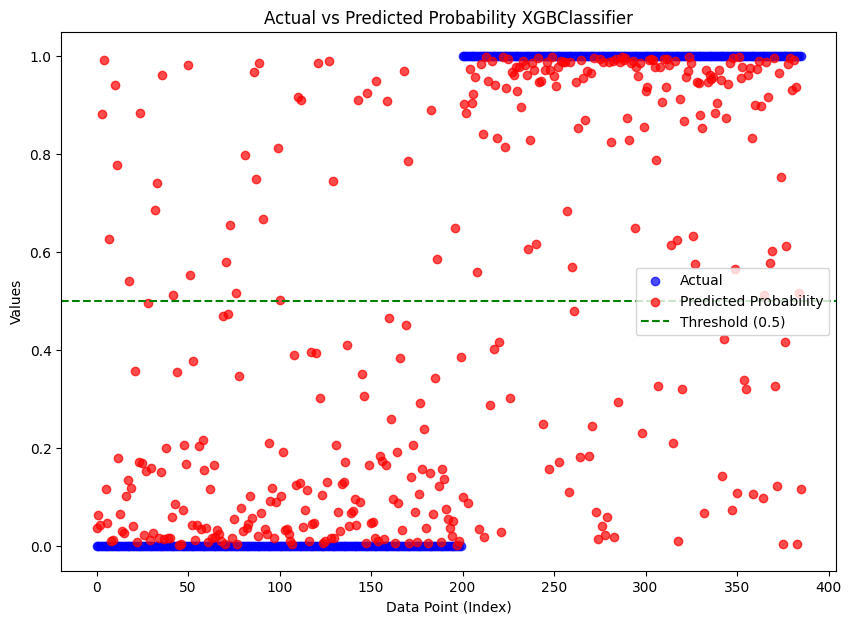

In [85]:
predictedVsActualPlot(table_xgbc_2)

Confusion Matrix - XGB Classifier
Classification Report - XGB Classifier
              precision    recall  f1-score   support

           1       0.79      0.76      0.78       186
           0       0.79      0.81      0.80       200

    accuracy                           0.79       386
   macro avg       0.79      0.79      0.79       386
weighted avg       0.79      0.79      0.79       386



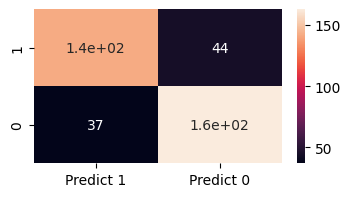

In [86]:
# Compute and print the confusion matrix
print("Confusion Matrix - XGB Classifier")
cm = confusion_matrix(y_test, y_predict_XGB_2, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(4,2))
sns.heatmap(df_cm, annot=True)

# Print the classification report
print("Classification Report - XGB Classifier")
print(classification_report(y_test, y_predict_XGB_2, labels=[1, 0]))


saveMetricsFinalDf('XGBoost (HPT)', y_test, y_predict_XGB_2)
saveModel(best_model_xgbc_2, 'xgbc_2')


# Voting Classificator

In [87]:
# Create a Voting Classifier (Soft Voting)


model_voting = VotingClassifier(estimators=[('LR', best_model_lr_2), ('KNN', best_model_knn_2), ('NB', model_nb), ('SVM', best_model_svm_2), ('RF', best_model_rf), ('BG', best_model_bgcl_2), ('ADA', best_model_adabc_2), ('XGB', best_model_xgbc_2)], voting='soft')
# Fit and evaluate the model
model_voting.fit(X_train, y_train)
accuracy_soft = model_voting.score(X_test, y_test)
print(f'Accuracy (Soft Voting): {accuracy_soft}')

# Make predictions on the test set
y_predict_voting_cl = model_voting.predict(X_test)

/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_cate

Accuracy (Soft Voting): 0.7901554404145078


/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_cate

In [88]:
table_clf_soft = predictedVsActualTable(model_voting, X_test, y_test)
print(table_clf_soft)

      Actual  Predicted_Probability  Predicted_Class
303      0.0               0.239942              0.0
355      0.0               0.125113              0.0
452      0.0               0.345980              0.0
259      1.0               0.861181              1.0
789      1.0               0.782492              1.0
...      ...                    ...              ...
791      1.0               0.755822              1.0
1097     0.0               0.379250              0.0
692      1.0               0.463490              0.0
769      1.0               0.499358              0.0
868      0.0               0.266847              0.0

[386 rows x 3 columns]


/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_cate

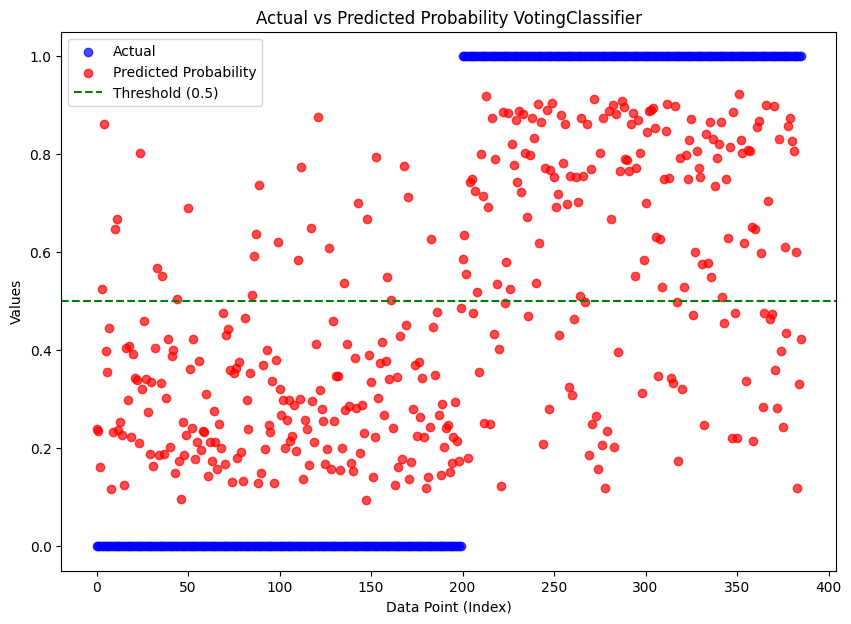

In [89]:
predictedVsActualPlot(table_clf_soft)

Confusion Matrix - Voting Classifier
Classification Report - Voting Classifier


              precision    recall  f1-score   support

           1       0.83      0.72      0.77       186
           0       0.76      0.86      0.81       200

    accuracy                           0.79       386
   macro avg       0.80      0.79      0.79       386
weighted avg       0.79      0.79      0.79       386



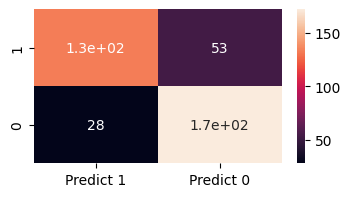

In [90]:
# Compute and print the confusion matrix
print("Confusion Matrix - Voting Classifier")
cm = confusion_matrix(y_test, y_predict_voting_cl, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(4,2))
sns.heatmap(df_cm, annot=True)

# Print the classification report
print("Classification Report - Voting Classifier")
print(classification_report(y_test, y_predict_voting_cl, labels=[1, 0]))


saveMetricsFinalDf('Voting Classifier - soft', y_test, y_predict_voting_cl)
saveModel(model_voting, 'voting')


# Final Results

In [91]:
(final_results_df)

,accuracy,precision,recall,f1-score
Logistic Regression (HPT),0.70,0.70,0.70,0.70
KNN (HPT),0.73,0.73,0.73,0.72
NB,0.63,0.63,0.63,0.62
SVM (HPT),0.78,0.78,0.78,0.78
Random Forest (HPT),0.80,0.80,0.80,0.79
Bagging (HPT),0.78,0.78,0.78,0.78
AdaBoost (HPT),0.76,0.76,0.76,0.76
XGBoost (HPT),0.79,0.79,0.79,0.79
Voting Classifier - soft,0.79,0.79,0.79,0.79


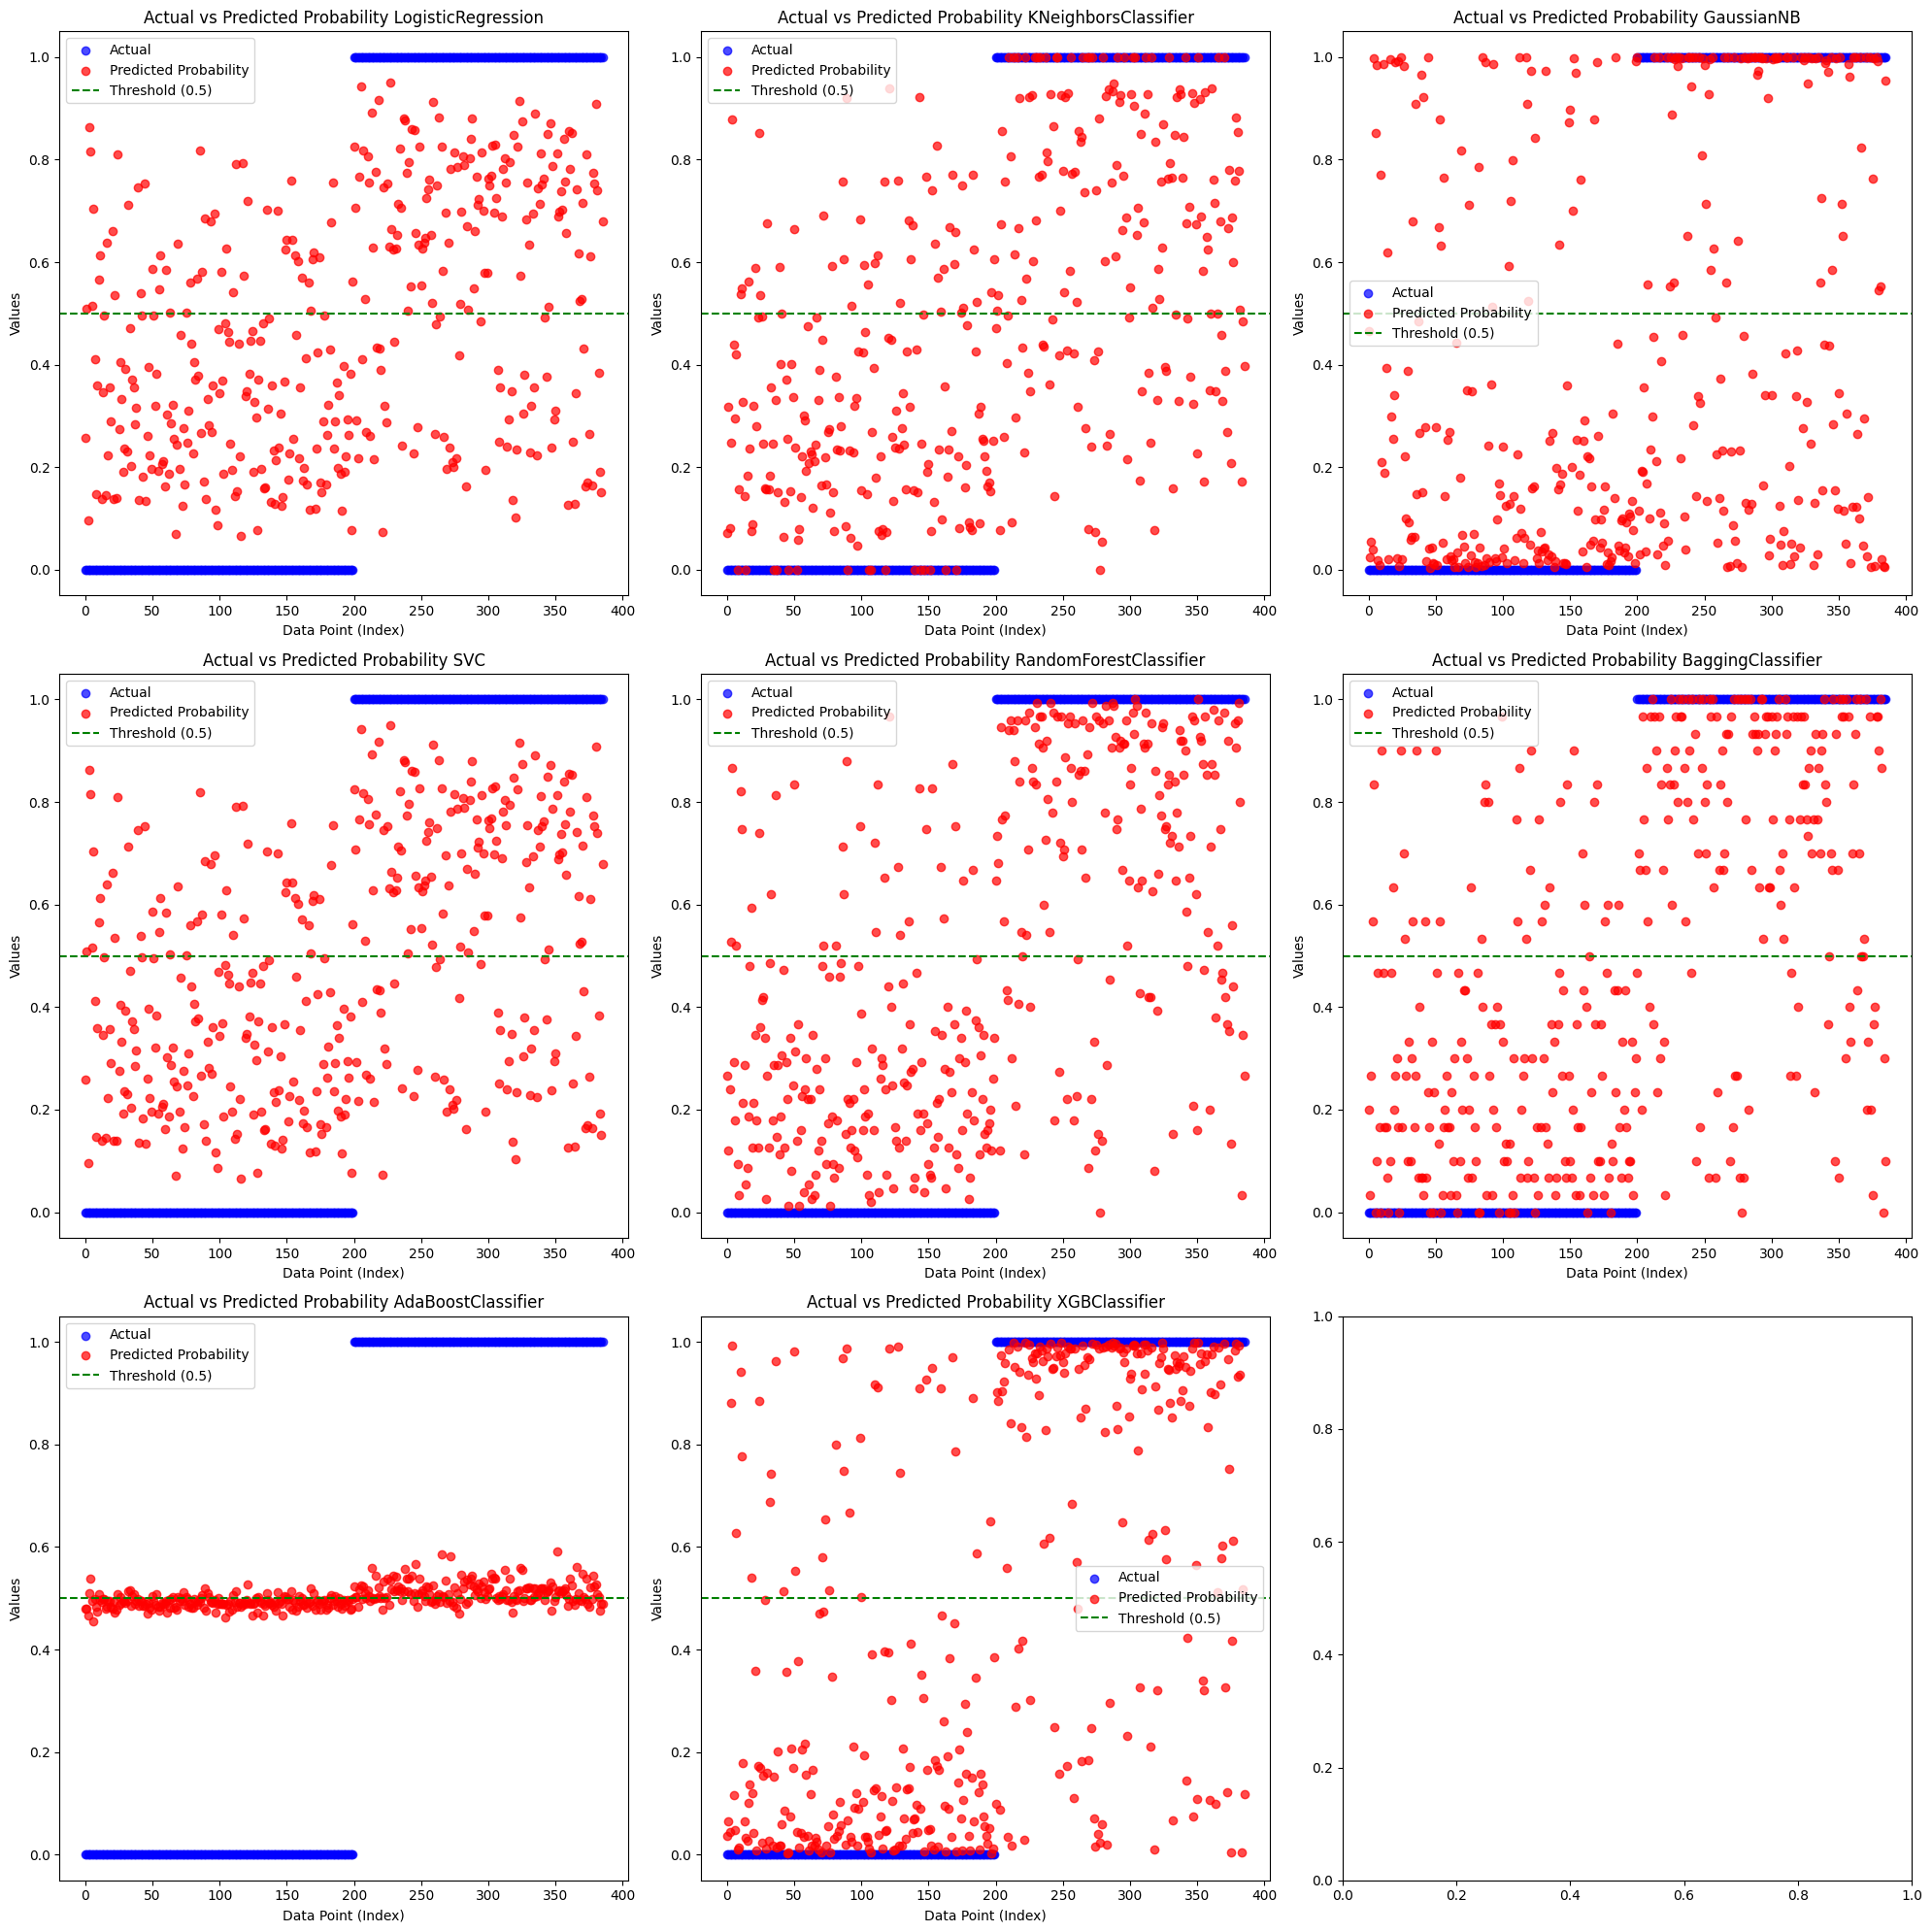

In [92]:

def PVASubplot(comparison_df, ax):
    # Sort the DataFrame by the 'Actual' column
    model_name = comparison_df.Name
    sorted_df = comparison_df.sort_values(by='Actual')

    # Scatter plot of Actual vs Predicted Probability
    ax.scatter(range(len(sorted_df)), sorted_df['Actual'], label='Actual', color='blue', alpha=0.7)
    ax.scatter(range(len(sorted_df)), sorted_df['Predicted_Probability'], label='Predicted Probability', color='red', alpha=0.7)

    # Draw a horizontal line at y=0.5
    ax.axhline(y=0.5, color='green', linestyle='--', label='Threshold (0.5)')

    ax.set_xlabel('Data Point (Index)')
    ax.set_ylabel('Values')
    ax.set_title('Actual vs Predicted Probability ' + model_name)
    ax.legend()


all_models_df = [table_lr_2, table_knn_2, table_nb, table_svm_2, table_rf, table_bgcl_2, table_adabc_2, table_xgbc_2]

rows = 3
cols = 3

# Create a subplot grid
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))

for i in range(len(all_models_df)):
    PVASubplot(all_models_df[i], axes[i//cols][i%rows])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


<b>IGNORE - (only for copy and paste purposes)</b>

In [93]:
blankIndex=[''] * len(final_results_df)
final_results_df.index=blankIndex
display(final_results_df)

,accuracy,precision,recall,f1-score
,0.70,0.70,0.70,0.70
,0.73,0.73,0.73,0.72
,0.63,0.63,0.63,0.62
,0.78,0.78,0.78,0.78
,0.80,0.80,0.80,0.79
,0.78,0.78,0.78,0.78
,0.76,0.76,0.76,0.76
,0.79,0.79,0.79,0.79
,0.79,0.79,0.79,0.79
